In [21]:
import pandas as pd
import matplotlib.pyplot as pltb
from matplotlib import pyplot as plt

In [22]:
df = pd.read_csv('venues_all.csv')
df.head()

,name,categories,lat,lng
0,Sayaji,Hotel,18.599535,73.754995
1,Little Italy,Italian Restaurant,18.591513,73.743668
2,MoMo Cafe,Indian Restaurant,18.591650,73.747011
3,Courtyard by Marriott,Hotel,18.591591,73.746877
4,Shaolin- The Chinese Cuisine,Chinese Restaurant,18.588343,73.783514


In [23]:
df.shape

(437, 4)

In [24]:
from sklearn.cluster import KMeans

In [25]:
Clus_dataSet = df[['lat','lng']] 
Clus_dataSet.head()

,lat,lng
0,18.599535,73.754995
1,18.591513,73.743668
2,18.591650,73.747011
3,18.591591,73.746877
4,18.588343,73.783514


In [26]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [27]:
Clus_dataSet_scale = StandardScaler().fit_transform(Clus_dataSet)
Clus_dataSet_scale[0:5]

array([[ 1.12059705, -1.36346504],
       [ 0.92689667, -1.5616871 ],
       [ 0.93020864, -1.50318116],
       [ 0.92878855, -1.50551954],
       [ 0.85036777, -0.86440237]])

In [28]:
dist = []
list_k = list(range(1, 12))      # list of values of k to test for

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(Clus_dataSet_scale)
    dist.append(km.inertia_)   

Text(0, 0.5, 'Sum of squared distance')

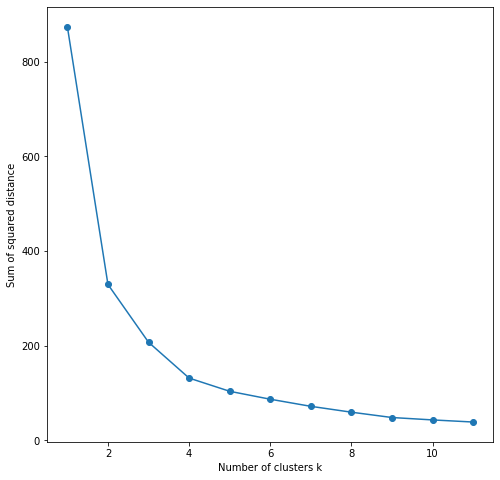

In [29]:
# Plot dist against k
plt.figure(figsize=(8, 8))
plt.plot(list_k, dist, '-o')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared distance')

In [30]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Clus_dataSet_scale)

# check cluster labels generated for each row in the dataframe
labels = kmeans.labels_
labels

array([3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 0, 2, 2, 0, 3, 3, 3, 3, 3, 0, 3, 3,
       0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 2, 3, 0,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 2, 0, 3, 3, 2, 3, 0, 3, 0, 0, 3, 3, 2,
       3, 3, 3, 3, 0, 3, 3, 3, 3, 2, 0, 3, 3, 0, 3, 0, 3, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 4,
       0, 4, 0, 0, 0, 4, 0, 4, 4, 0, 0, 0, 0, 4, 4, 0, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4, 4, 4, 4,
       4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1,

In [31]:
color_options = [
    'black', 'blue', 'darkgreen',
    'darkred', 'gray', 'green', 'lightblue', 'lightgreen', 'lightred',
    'orange', 'purple', 'red'
]

In [32]:
import folium
from folium import plugins

In [33]:
map_ = folium.Map(location=[df.lat[0], df.lng[0]], zoom_start=11)
# add markers to map
for lat, lng, Categories, name, lab in zip(df['lat'], df['lng'], df['categories'], df['name'], labels):
    label = '{}, {}'.format(name, Categories, lab)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=1,
        popup=label,
        color=color_options[lab],
        fill=True,
        fill_opacity=1,
        parse_html=False).add_to(map_)  
    
map_

In [34]:
cluster_centres = kmeans.cluster_centers_
cluster_centres

array([[ 0.21793528, -0.71768881],
       [-0.47121749,  1.23122998],
       [ 2.12945537, -0.77413961],
       [ 0.97290312, -1.26364513],
       [-0.91328574, -0.0455761 ]])

In [35]:
df_stops = pd.read_csv('stops.csv')
df_stops.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding
0,32769,151131,Forest Office Road,NaN,18.51983,73.63158,NaN,NaN,NaN,NaN,NaN,NaN
1,32770,152339,Kusalkar Putala,NaN,18.52889,73.82708,NaN,NaN,NaN,NaN,NaN,NaN
2,32771,154648,Tower Line,NaN,18.67007,73.78613,NaN,NaN,NaN,NaN,NaN,NaN
3,32772,153069,Nehrunagar Depot,NaN,18.62930,73.81942,NaN,NaN,NaN,NaN,NaN,NaN
4,32773,151724,Jagtap Chowk,NaN,18.49153,73.90019,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
from scipy import spatial

In [37]:
idx = []
for i in range(0,len(cluster_centres)):
    dist,index = spatial.KDTree(Clus_dataSet_scale).query(cluster_centres[i])
    idx.append(index)
idx

[152, 319, 84, 15, 225]

In [38]:
center_point = Clus_dataSet.iloc[idx][['lat','lng']]
center_point

,lat,lng
152,18.559476,73.790409
319,18.534466,73.899751
84,18.644545,73.790993
15,18.593894,73.763607
225,18.514030,73.828750


In [39]:
df_stops[['stop_lat','stop_lon']].isna().any()

stop_lat    False
stop_lon    False
dtype: bool

In [40]:
df_stops.shape

(5624, 12)

In [41]:
df_stops.dropna(axis=1,inplace=True)
df_stops.drop(columns=['stop_code','stop_id'],inplace=True)
df_stops.shape

(5624, 3)

In [42]:
from geopy import distance
df_stops.head()

,stop_name,stop_lat,stop_lon
0,Forest Office Road,18.51983,73.63158
1,Kusalkar Putala,18.52889,73.82708
2,Tower Line,18.67007,73.78613
3,Nehrunagar Depot,18.62930,73.81942
4,Jagtap Chowk,18.49153,73.90019


In [43]:
#dis = distance.distance(center_point_tuple, test_point_tuple).km
radius = 5
test_point_list = df_stops[['stop_lat','stop_lon']].values.tolist()
test_point_list[:5]

[[18.51983, 73.63158],
 [18.52889, 73.82708],
 [18.67007, 73.78613],
 [18.6293, 73.81942],
 [18.49153, 73.90019]]

In [44]:
center_point_list = center_point.values.tolist()
center_point_list[:5]

[[18.55947591740865, 73.7904085891615],
 [18.53446645624323, 73.89975061647455],
 [18.644544988209127, 73.79099337045375],
 [18.593893849415267, 73.76360660453777],
 [18.51402998348028, 73.82874953293054]]

In [45]:
stops_in_range = pd.DataFrame(columns=['stop_name','stop_lat','stop_lat'])
for i in range(0,len(center_point_list)):
    for j in range(0,len(test_point_list)):
        print('j = ',j)
        dis = distance.distance(center_point_list[i], test_point_list[j]).km
        if dis > radius:
            df_stops.drop(index=j,inplace=True)

j =  0
j =  1
j =  2
j =  3
j =  4
j =  5
j =  6
j =  7
j =  8
j =  9
j =  10
j =  11
j =  12
j =  13
j =  14
j =  15
j =  16
j =  17
j =  18
j =  19
j =  20
j =  21
j =  22
j =  23
j =  24
j =  25
j =  26
j =  27
j =  28
j =  29
j =  30
j =  31
j =  32
j =  33
j =  34
j =  35
j =  36
j =  37
j =  38
j =  39
j =  40
j =  41
j =  42
j =  43
j =  44
j =  45
j =  46
j =  47
j =  48
j =  49
j =  50
j =  51
j =  52
j =  53
j =  54
j =  55
j =  56
j =  57
j =  58
j =  59
j =  60
j =  61
j =  62
j =  63
j =  64
j =  65
j =  66
j =  67
j =  68
j =  69
j =  70
j =  71
j =  72
j =  73
j =  74
j =  75
j =  76
j =  77
j =  78
j =  79
j =  80
j =  81
j =  82
j =  83
j =  84
j =  85
j =  86
j =  87
j =  88
j =  89
j =  90
j =  91
j =  92
j =  93
j =  94
j =  95
j =  96
j =  97
j =  98
j =  99
j =  100
j =  101
j =  102
j =  103
j =  104
j =  105
j =  106
j =  107
j =  108
j =  109
j =  110
j =  111
j =  112
j =  113
j =  114
j =  115
j =  116
j =  117
j =  118
j =  119
j =  120
j =  121
j =  122
j =

j =  996
j =  997
j =  998
j =  999
j =  1000
j =  1001
j =  1002
j =  1003
j =  1004
j =  1005
j =  1006
j =  1007
j =  1008
j =  1009
j =  1010
j =  1011
j =  1012
j =  1013
j =  1014
j =  1015
j =  1016
j =  1017
j =  1018
j =  1019
j =  1020
j =  1021
j =  1022
j =  1023
j =  1024
j =  1025
j =  1026
j =  1027
j =  1028
j =  1029
j =  1030
j =  1031
j =  1032
j =  1033
j =  1034
j =  1035
j =  1036
j =  1037
j =  1038
j =  1039
j =  1040
j =  1041
j =  1042
j =  1043
j =  1044
j =  1045
j =  1046
j =  1047
j =  1048
j =  1049
j =  1050
j =  1051
j =  1052
j =  1053
j =  1054
j =  1055
j =  1056
j =  1057
j =  1058
j =  1059
j =  1060
j =  1061
j =  1062
j =  1063
j =  1064
j =  1065
j =  1066
j =  1067
j =  1068
j =  1069
j =  1070
j =  1071
j =  1072
j =  1073
j =  1074
j =  1075
j =  1076
j =  1077
j =  1078
j =  1079
j =  1080
j =  1081
j =  1082
j =  1083
j =  1084
j =  1085
j =  1086
j =  1087
j =  1088
j =  1089
j =  1090
j =  1091
j =  1092
j =  1093
j =  1094
j =  1095
j = 

j =  1883
j =  1884
j =  1885
j =  1886
j =  1887
j =  1888
j =  1889
j =  1890
j =  1891
j =  1892
j =  1893
j =  1894
j =  1895
j =  1896
j =  1897
j =  1898
j =  1899
j =  1900
j =  1901
j =  1902
j =  1903
j =  1904
j =  1905
j =  1906
j =  1907
j =  1908
j =  1909
j =  1910
j =  1911
j =  1912
j =  1913
j =  1914
j =  1915
j =  1916
j =  1917
j =  1918
j =  1919
j =  1920
j =  1921
j =  1922
j =  1923
j =  1924
j =  1925
j =  1926
j =  1927
j =  1928
j =  1929
j =  1930
j =  1931
j =  1932
j =  1933
j =  1934
j =  1935
j =  1936
j =  1937
j =  1938
j =  1939
j =  1940
j =  1941
j =  1942
j =  1943
j =  1944
j =  1945
j =  1946
j =  1947
j =  1948
j =  1949
j =  1950
j =  1951
j =  1952
j =  1953
j =  1954
j =  1955
j =  1956
j =  1957
j =  1958
j =  1959
j =  1960
j =  1961
j =  1962
j =  1963
j =  1964
j =  1965
j =  1966
j =  1967
j =  1968
j =  1969
j =  1970
j =  1971
j =  1972
j =  1973
j =  1974
j =  1975
j =  1976
j =  1977
j =  1978
j =  1979
j =  1980
j =  1981
j =  1982


j =  2716
j =  2717
j =  2718
j =  2719
j =  2720
j =  2721
j =  2722
j =  2723
j =  2724
j =  2725
j =  2726
j =  2727
j =  2728
j =  2729
j =  2730
j =  2731
j =  2732
j =  2733
j =  2734
j =  2735
j =  2736
j =  2737
j =  2738
j =  2739
j =  2740
j =  2741
j =  2742
j =  2743
j =  2744
j =  2745
j =  2746
j =  2747
j =  2748
j =  2749
j =  2750
j =  2751
j =  2752
j =  2753
j =  2754
j =  2755
j =  2756
j =  2757
j =  2758
j =  2759
j =  2760
j =  2761
j =  2762
j =  2763
j =  2764
j =  2765
j =  2766
j =  2767
j =  2768
j =  2769
j =  2770
j =  2771
j =  2772
j =  2773
j =  2774
j =  2775
j =  2776
j =  2777
j =  2778
j =  2779
j =  2780
j =  2781
j =  2782
j =  2783
j =  2784
j =  2785
j =  2786
j =  2787
j =  2788
j =  2789
j =  2790
j =  2791
j =  2792
j =  2793
j =  2794
j =  2795
j =  2796
j =  2797
j =  2798
j =  2799
j =  2800
j =  2801
j =  2802
j =  2803
j =  2804
j =  2805
j =  2806
j =  2807
j =  2808
j =  2809
j =  2810
j =  2811
j =  2812
j =  2813
j =  2814
j =  2815


j =  3578
j =  3579
j =  3580
j =  3581
j =  3582
j =  3583
j =  3584
j =  3585
j =  3586
j =  3587
j =  3588
j =  3589
j =  3590
j =  3591
j =  3592
j =  3593
j =  3594
j =  3595
j =  3596
j =  3597
j =  3598
j =  3599
j =  3600
j =  3601
j =  3602
j =  3603
j =  3604
j =  3605
j =  3606
j =  3607
j =  3608
j =  3609
j =  3610
j =  3611
j =  3612
j =  3613
j =  3614
j =  3615
j =  3616
j =  3617
j =  3618
j =  3619
j =  3620
j =  3621
j =  3622
j =  3623
j =  3624
j =  3625
j =  3626
j =  3627
j =  3628
j =  3629
j =  3630
j =  3631
j =  3632
j =  3633
j =  3634
j =  3635
j =  3636
j =  3637
j =  3638
j =  3639
j =  3640
j =  3641
j =  3642
j =  3643
j =  3644
j =  3645
j =  3646
j =  3647
j =  3648
j =  3649
j =  3650
j =  3651
j =  3652
j =  3653
j =  3654
j =  3655
j =  3656
j =  3657
j =  3658
j =  3659
j =  3660
j =  3661
j =  3662
j =  3663
j =  3664
j =  3665
j =  3666
j =  3667
j =  3668
j =  3669
j =  3670
j =  3671
j =  3672
j =  3673
j =  3674
j =  3675
j =  3676
j =  3677


j =  4403
j =  4404
j =  4405
j =  4406
j =  4407
j =  4408
j =  4409
j =  4410
j =  4411
j =  4412
j =  4413
j =  4414
j =  4415
j =  4416
j =  4417
j =  4418
j =  4419
j =  4420
j =  4421
j =  4422
j =  4423
j =  4424
j =  4425
j =  4426
j =  4427
j =  4428
j =  4429
j =  4430
j =  4431
j =  4432
j =  4433
j =  4434
j =  4435
j =  4436
j =  4437
j =  4438
j =  4439
j =  4440
j =  4441
j =  4442
j =  4443
j =  4444
j =  4445
j =  4446
j =  4447
j =  4448
j =  4449
j =  4450
j =  4451
j =  4452
j =  4453
j =  4454
j =  4455
j =  4456
j =  4457
j =  4458
j =  4459
j =  4460
j =  4461
j =  4462
j =  4463
j =  4464
j =  4465
j =  4466
j =  4467
j =  4468
j =  4469
j =  4470
j =  4471
j =  4472
j =  4473
j =  4474
j =  4475
j =  4476
j =  4477
j =  4478
j =  4479
j =  4480
j =  4481
j =  4482
j =  4483
j =  4484
j =  4485
j =  4486
j =  4487
j =  4488
j =  4489
j =  4490
j =  4491
j =  4492
j =  4493
j =  4494
j =  4495
j =  4496
j =  4497
j =  4498
j =  4499
j =  4500
j =  4501
j =  4502


j =  5325
j =  5326
j =  5327
j =  5328
j =  5329
j =  5330
j =  5331
j =  5332
j =  5333
j =  5334
j =  5335
j =  5336
j =  5337
j =  5338
j =  5339
j =  5340
j =  5341
j =  5342
j =  5343
j =  5344
j =  5345
j =  5346
j =  5347
j =  5348
j =  5349
j =  5350
j =  5351
j =  5352
j =  5353
j =  5354
j =  5355
j =  5356
j =  5357
j =  5358
j =  5359
j =  5360
j =  5361
j =  5362
j =  5363
j =  5364
j =  5365
j =  5366
j =  5367
j =  5368
j =  5369
j =  5370
j =  5371
j =  5372
j =  5373
j =  5374
j =  5375
j =  5376
j =  5377
j =  5378
j =  5379
j =  5380
j =  5381
j =  5382
j =  5383
j =  5384
j =  5385
j =  5386
j =  5387
j =  5388
j =  5389
j =  5390
j =  5391
j =  5392
j =  5393
j =  5394
j =  5395
j =  5396
j =  5397
j =  5398
j =  5399
j =  5400
j =  5401
j =  5402
j =  5403
j =  5404
j =  5405
j =  5406
j =  5407
j =  5408
j =  5409
j =  5410
j =  5411
j =  5412
j =  5413
j =  5414
j =  5415
j =  5416
j =  5417
j =  5418
j =  5419
j =  5420
j =  5421
j =  5422
j =  5423
j =  5424


KeyError: '[0] not found in axis'

In [46]:
df_stops.shape

(536, 3)

In [47]:
map_bus = folium.Map(location=[18.561883,73.810196],
                      zoom_start=10)
# add markers to map
for lat, lng, name in zip(df_stops['stop_lat'], df_stops['stop_lon'],df_stops['stop_name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],
                        radius=1,
                        color='blue',
                        popup=label,
                        fill=True,
                        fill_opacity=1,
                        parse_html=False).add_to(map_bus)

map_bus